In [1]:
import cv2
import os
import mediapipe as mp

# Initialize MediaPipe hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# List of letters to capture
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# Create a directory to store the dataset if it doesn't exist
dataset_dir = 'Hand Gesture Recognition'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Function to capture images for each letter
def capture_images_for_letter(letter, num_images=200):
    # Create a directory for the letter if it doesn't exist
    letter_dir = os.path.join(dataset_dir, letter)
    if not os.path.exists(letter_dir):
        os.makedirs(letter_dir)

    # Open the webcam
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    print(f"Press any key to start capturing images for letter: {letter}")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Flip the frame to avoid mirror effect
        frame = cv2.flip(frame, 1)

        # Display the instruction label on the frame
        cv2.putText(frame, "Press any key to start capturing images", (10, 30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show the frame
        cv2.imshow('Hand Detection', frame)

        # Break the loop if any key is pressed
        if cv2.waitKey(1) & 0xFF != 255:
            break

    print(f"Capturing images for letter: {letter}")
    count = 0
    while count < num_images:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Flip the frame to avoid mirror effect
        frame = cv2.flip(frame, 1)

        # Convert the BGR image to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect hands
        results = hands.process(frame_rgb)

        # Check if any hand is detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                h, w, _ = frame.shape
                x_min = int(min([lm.x for lm in hand_landmarks.landmark]) * w)
                x_max = int(max([lm.x for lm in hand_landmarks.landmark]) * w)
                y_min = int(min([lm.y for lm in hand_landmarks.landmark]) * h)
                y_max = int(max([lm.y for lm in hand_landmarks.landmark]) * h)

                # Expand the bounding box a bit
                box_margin = 30
                x_min = max(x_min - box_margin, 0)
                x_max = min(x_max + box_margin, w)
                y_min = max(y_min - box_margin, 0)
                y_max = min(y_max + box_margin, h)

                # Draw bounding box around the hand
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

                # Crop the hand region
                hand_region = frame[y_min:y_max, x_min:x_max]

                # Save the cropped hand image
                img_path = os.path.join(letter_dir, f'{letter}_{count}.jpg')
                cv2.imwrite(img_path, hand_region)
                count += 1

        # Display the letter label on the frame
        cv2.putText(frame, f"Letter: {letter}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Show the frame
        cv2.imshow('Hand Detection', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the webcam and close the window
    cap.release()
    cv2.destroyAllWindows()

# Loop through each letter and capture images
for letter in letters:
    capture_images_for_letter(letter)

print("Dataset creation complete!")

Press any key to start capturing images for letter: A
Capturing images for letter: A
Press any key to start capturing images for letter: B
Capturing images for letter: B
Press any key to start capturing images for letter: C
Capturing images for letter: C
Press any key to start capturing images for letter: D
Capturing images for letter: D
Press any key to start capturing images for letter: E
Capturing images for letter: E
Press any key to start capturing images for letter: F
Capturing images for letter: F
Press any key to start capturing images for letter: G
Capturing images for letter: G
Press any key to start capturing images for letter: H
Capturing images for letter: H
Press any key to start capturing images for letter: I
Capturing images for letter: I
Press any key to start capturing images for letter: J
Capturing images for letter: J
Press any key to start capturing images for letter: K
Capturing images for letter: K
Press any key to start capturing images for letter: L
Capturing i

Class Names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


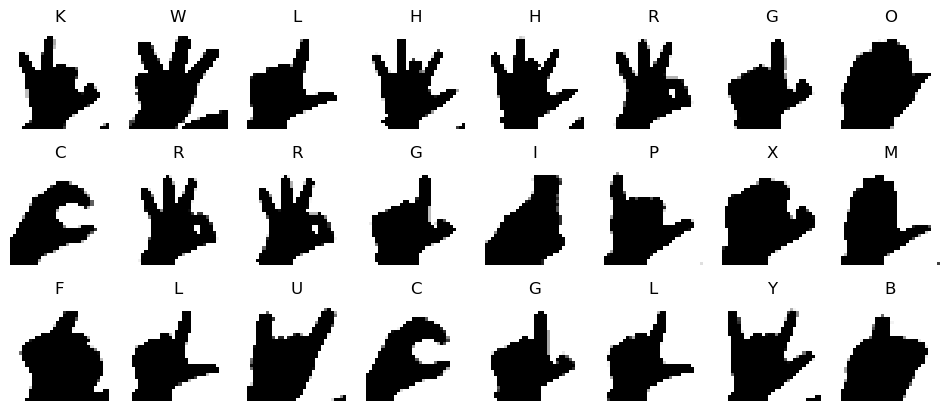

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

directory_path = r"C:\Users\scsai\Hand Gesture Recognition"

# Parameters
img_size = 32
validation_split = 0.2
test_split = 0.1

# Function to load images and labels using OpenCV
def load_images_from_directory(directory_path, img_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory_path))  # Get sorted class names
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory_path, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)  # Load image using OpenCV
            img = cv2.flip(img, 1)  # Flip image horizontally (mirror-wise)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.GaussianBlur(img, (15, 15), 0)  # Apply Gaussian blur
            _, img = cv2.threshold(img, 161, 255, cv2.THRESH_BINARY)  # Apply thresholding
            img = cv2.resize(img, (img_size, img_size))  # Resize image
            img = img.astype('float32') / 255.0  # Normalize image
            images.append(img)
            labels.append(label)  # Append corresponding label
    return np.array(images), np.array(labels), class_names

# Load the dataset using OpenCV
images, labels, class_names = load_images_from_directory(directory_path, img_size)

# Add a channel dimension to images for grayscale (necessary for CNN models)
images = np.expand_dims(images, axis=-1)

# Split the dataset into training, validation, and test sets
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=(validation_split + test_split), random_state=123, stratify=labels
)

val_size = validation_split / (validation_split + test_split)  # Adjust validation size relative to temp set
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=val_size, random_state=123, stratify=temp_labels
)

# Print class names to check
print("Class Names:", class_names)

# Save the dataset to .npz (compressed format) for later use
np.savez_compressed('asl_dataset.npz', 
                    train_images=train_images, train_labels=train_labels,
                    val_images=val_images, val_labels=val_labels,
                    test_images=test_images, test_labels=test_labels,
                    class_names=class_names)

# Visualize 24 sample images from the training set
plt.figure(figsize=(12, 5))
for i in range(24):
    plt.subplot(3, 8, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')  # Squeeze to remove channel dimension for grayscale
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

Dataset loaded successfully!
Training set size: (3639, 32, 32, 1)
Validation set size: (520, 32, 32, 1)
Test set size: (1041, 32, 32, 1)


C:\Users\scsai\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,210 (1.21 MB)

 Trainable params: 317,210 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/35


C:\Users\scsai\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.1233 - loss: 3.0418 - val_accuracy: 0.7462 - val_loss: 0.8940
Epoch 2/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.4630 - loss: 1.6239 - val_accuracy: 0.9942 - val_loss: 0.1684
Epoch 3/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.6654 - loss: 0.9746 - val_accuracy: 0.9750 - val_loss: 0.1101
Epoch 4/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7382 - loss: 0.7332 - val_accuracy: 0.9962 - val_loss: 0.0548
Epoch 5/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8119 - loss: 0.5401 - val_accuracy: 0.9962 - val_loss: 0.0400
Epoch 6/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8400 - loss: 0.4512 - val_accuracy: 0.9962 - val_loss: 0.0432
Epoch 7/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8590 - loss: 0.3928 - val_accuracy: 0.9962 - val_loss: 0.0301
Epoch 8/35
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9019 - loss: 0.3118 - val_accuracy

The accuracy of the model for test data is: 100.0
The Loss of the model for test data is: 5.190114097786136e-05
Model saved as asl_cnn_model.h5


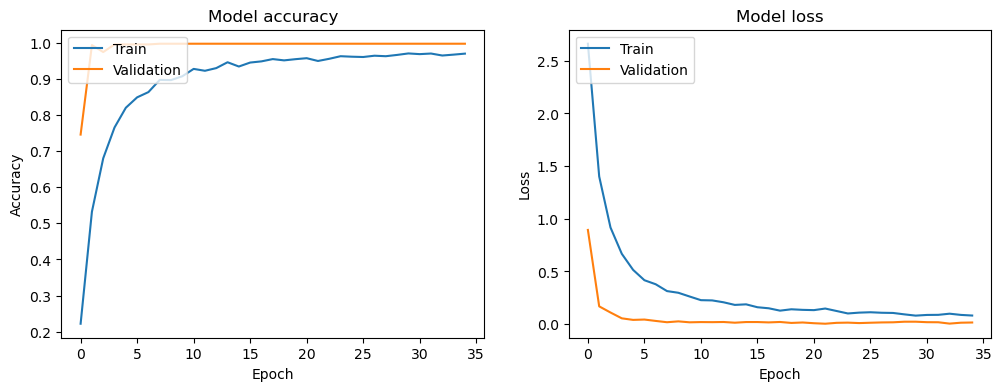

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the dataset from the saved .npz file
data = np.load(r"C:\Users\scsai\Hand Gesture Recognition.npz")

# Extract the training, validation, and test datasets
train_images = data['train_images']
train_labels = data['train_labels']
val_images = data['val_images']
val_labels = data['val_labels']
test_images = data['test_images']
test_labels = data['test_labels']
class_names = data['class_names']

print("Dataset loaded successfully!")
print(f"Training set size: {train_images.shape}")
print(f"Validation set size: {val_images.shape}")
print(f"Test set size: {test_images.shape}")

# Convert labels to categorical (one-hot encoding)
num_classes = len(class_names)
train_labels_categorical = to_categorical(train_labels, num_classes)
val_labels_categorical = to_categorical(val_labels, num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes)


# Define the image size
image_size = train_images.shape[1]


# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels_categorical, batch_size=32)
val_generator = val_datagen.flow(val_images, val_labels_categorical, batch_size=32)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_generator, epochs=35, validation_data=val_generator)

# Evaluate the model on the test data
loss, acc = model.evaluate(test_images, test_labels_categorical, verbose=0)
print('The accuracy of the model for test data is:', acc * 100)
print('The Loss of the model for test data is:', loss)

# Save the model
model.save('asl_cnn_model.h5')
print('Model saved as asl_cnn_model.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [5]:
import cv2
import numpy as np
import mediapipe as mp
from keras.models import load_model
import time
from concurrent.futures import ThreadPoolExecutor

# Model configuration
image_size = 32
previous_letter = None

# Load the trained ASL recognition model
model = load_model(r"C:\Users\scsai\Hand Gesture Recognition.h5")

# Initialize MediaPipe Hand Detector
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Create a thread pool for predictions
executor = ThreadPoolExecutor(max_workers=2)

# Preprocessing function
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (15, 15), 0)
    _, thresholded = cv2.threshold(gray, 161, 255, cv2.THRESH_BINARY)
    resized = cv2.resize(thresholded, (image_size, image_size))
    normalized = resized / 255.0
    reshaped = np.reshape(normalized, (1, image_size, image_size, 1))
    return reshaped, thresholded

# ASL letter prediction function
def predict_asl_letter(prediction):
    asl_letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'  
    return asl_letters[prediction]

# Prediction function using a thread pool
def predict_thread(preprocessed_image):
    prediction = model.predict(preprocessed_image)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100
    return predicted_label, confidence

# Start video capture
cap = cv2.VideoCapture(0)
recognized_text = ""
asl_letter = ""
last_letter_time = 0
predicted_label, confidence = None, 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Flip the frame for a mirror effect
    frame = cv2.flip(frame, 1)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            h, w, c = frame.shape
            x_min, y_min, x_max, y_max = w, h, 0, 0

            for landmark in hand_landmarks.landmark:
                x, y = int(landmark.x * w), int(landmark.y * h)
                x_min, y_min = min(x_min, x), min(y_min, y)
                x_max, y_max = max(x_max, x), max(y_max, y)

            margin = 30
            x_min, y_min = max(0, x_min - margin), max(0, y_min - margin)
            x_max, y_max = min(w, x_max + margin), min(h, y_max + margin)
            hand_image = frame[y_min:y_max, x_min:x_max]

            # Preprocess the cropped hand image
            preprocessed_image, resized_image = preprocess_image(hand_image)

            # Predict asynchronously
            future = executor.submit(predict_thread, preprocessed_image)
            predicted_label, confidence = future.result()

            if predicted_label is not None:
                asl_letter = predict_asl_letter(predicted_label)

                # Draw a bounding box and prediction text
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                cv2.putText(frame, f'ASL Letter: {asl_letter} ({confidence:.2f}%)',
                            (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            cv2.imshow('Preprocessed Image', resized_image)

    # Display the video frame
    cv2.imshow('ASL Recognition', frame)

    # Create a text window
    text_window = np.ones((200, 500, 3), dtype=np.uint8) * 255
    cv2.putText(text_window, 'Recognized Text:', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    cv2.putText(text_window, recognized_text, (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow('Recognized Text', text_window)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

    current_time = time.time()

    if asl_letter != previous_letter:
        last_letter_time = current_time
        previous_letter = asl_letter
    else:
        if current_time - last_letter_time >= 2.5:
            recognized_text += asl_letter
            last_letter_time = current_time

    # Manage the text input
    if key == ord('c'):
        recognized_text = ''
    if key == ord('s'):
        recognized_text += " "
    if key == ord('b'):
        recognized_text = recognized_text[:-1]

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━